In [1]:
# 한글 깨짐 방지를 위해 나눔 글꼴 설치
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
# 런타임 다시 시작 후 실행
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터마이닝/Leftjoin_data.csv', engine = 'python')

# [2016~2022년 리포트에 대한 분석]

# 작성일 데이터 타입 datetime 으로 변환
df['작성일'] = pd.to_datetime(df['작성일'], format = '%y.%m.%d')
df_test = df.loc[(df['작성일']>='2016-01-01') & (df['작성일']<='2023-01-01')]

# 10편 이상 쓴 사람 추출
df1 = pd.DataFrame({'Report count' : df.groupby('Writer_ID').size()}).reset_index()
df = df.merge(df1, on = "Writer_ID", how = "left")
df = df.loc[df['Report count']>=10]

# 500편 이상 섹터 추출
df2 = pd.DataFrame({'Sector count' : df.groupby('sector').size()}).reset_index()
df = df.merge(df2, on = "sector", how = "left")
df = df.loc[df['Sector count']>=500]

df = df[df['편향1(%)']<80]
df = df[df['종목명']!='미창석유']
df = df.sort_values(['Writer_ID', '작성일'])

# # 매해 3편 이상 쓴 사람 추출
# cnt=0
# for wr in df['Writer_ID'].unique():
#   df_temp = df.loc[df['Writer_ID']==wr]
#   streak = True
#   for y in range(2019,2024):
#     if len(df_temp.loc[(df['작성일']>=np.datetime64(str(y)+'-01-01')) & (df['작성일']<np.datetime64(str(y+1)+'-01-01'))])<3:
#       streak=False
#       break

#   if(streak):
#     print(wr+'\n')
#     cnt = cnt+1

# print(cnt)

In [3]:
# sector 별 애널리스트 수
df_sector_ID_count = pd.DataFrame(df.groupby('sector')['Writer_ID'].nunique()).reset_index()
df_sector_ID_count
print(df['Writer_ID'].nunique())
#pd.DataFrame(df.groupby('Writer_ID').size()).reset_index()

407


In [4]:
# # Writer ID 별 시각화

# df_W = df[['Writer_ID', '편향6(%)', '편향12(%)']]
# df_W = df_W.groupby('Writer_ID').std()

# plt.subplot(211)
# df_W['편향6(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 6 month group by Wirter ID')
# plt.xticks(rotation=45)
# plt.ylabel('std')
# plt.gca().spines[['top', 'right']].set_visible(False)

# plt.subplot(212)
# df_W['편향12(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 12 month group by Wirter ID')
# plt.xticks(rotation=45)
# plt.ylabel('std')
# plt.gca().spines[['top', 'right']].set_visible(False)

# plt.subplots_adjust(left=0.1, bottom=0,  right=1, top=0.8, wspace=0.5, hspace=0.9)

In [5]:
# Sector 별 시각화

# df_S = df[['sector', '편향6(%)', '편향12(%)']]
# df_S = df_S.groupby('sector').std()

# plt.subplot(211)
# df_S['편향6(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 6 month group by Sector')
# plt.xticks(rotation=45)
# plt.ylabel('std')
# plt.gca().spines[['top', 'right']].set_visible(False)

# plt.subplot(212)
# df_S['편향12(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 12 month group by Sector')
# plt.xticks(rotation=45)
# plt.ylabel('std')
# plt.gca().spines[['top', 'right']].set_visible(False)

# plt.subplots_adjust(left=0.1, bottom=0,  right=1, top=0.8, wspace=0.5, hspace=0.9)

In [6]:
# # 6개월 섹터별 상위
# fig = plt.figure(figsize=(32, 36))

# cnt = 1
# for i in df['sector'].unique():
#   df_top = df.loc[df['sector'] == i]
#   df_top = df_top[['Writer_ID', '편향6(%)']]

#   # 특정 섹터에서 레포트 5개 이상 작성한 사람의 레포트만 추출
#   df_temp = pd.DataFrame({'Report count': df_top.groupby('Writer_ID').size()}).reset_index()
#   df_top = df_top.merge(df_temp, on = 'Writer_ID', how = 'left')
#   df_top = df_top.loc[df_top['Report count']>=5]

#   df_top = df_top.groupby('Writer_ID').std()
#   idcnt = df_sector_ID_count['Writer_ID'].loc[df_sector_ID_count['sector']==i]
#   df_top = df_top.sort_values(by = '편향6(%)')[:int(idcnt*0.1)] # 섹터별 상위 10% 시각화

#   plt.subplot(5, 5, cnt)
#   df_top['편향6(%)'].plot(kind='bar', title='Top 10 Writer 6 month in '+i)
#   plt.ylabel('std(%)')
#   cnt = cnt + 1

# plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.8)
# plt.show()

In [7]:
# # 12개월 섹터별 상위
# fig = plt.figure(figsize=(32, 36))

# cnt = 1
# for i in df['sector'].unique():
#   df_top = df.loc[df['sector'] == i]
#   df_top = df_top[['Writer_ID', '편향12(%)']]

#   # 특정 섹터에서 레포트 5개 이상 작성한 사람의 레포트만 추출
#   df_temp = pd.DataFrame({'Report count': df_top.groupby('Writer_ID').size()}).reset_index()
#   df_top = df_top.merge(df_temp, on = 'Writer_ID', how = 'left')
#   df_top = df_top.loc[df_top['Report count']>=5]

#   df_top = df_top.groupby('Writer_ID').std()
#   idcnt = df_sector_ID_count['Writer_ID'].loc[df_sector_ID_count['sector']==i]
#   df_top = df_top.sort_values(by = '편향12(%)')[:int(idcnt*0.1)] # 섹터별 상위 10% 시각화

#   plt.subplot(5, 5, cnt)
#   df_top['편향12(%)'].plot(kind='bar', title='Top 10 Writer 12 month in '+i)
#   plt.ylabel('std(%)')
#   cnt = cnt + 1

# plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.8)
# plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


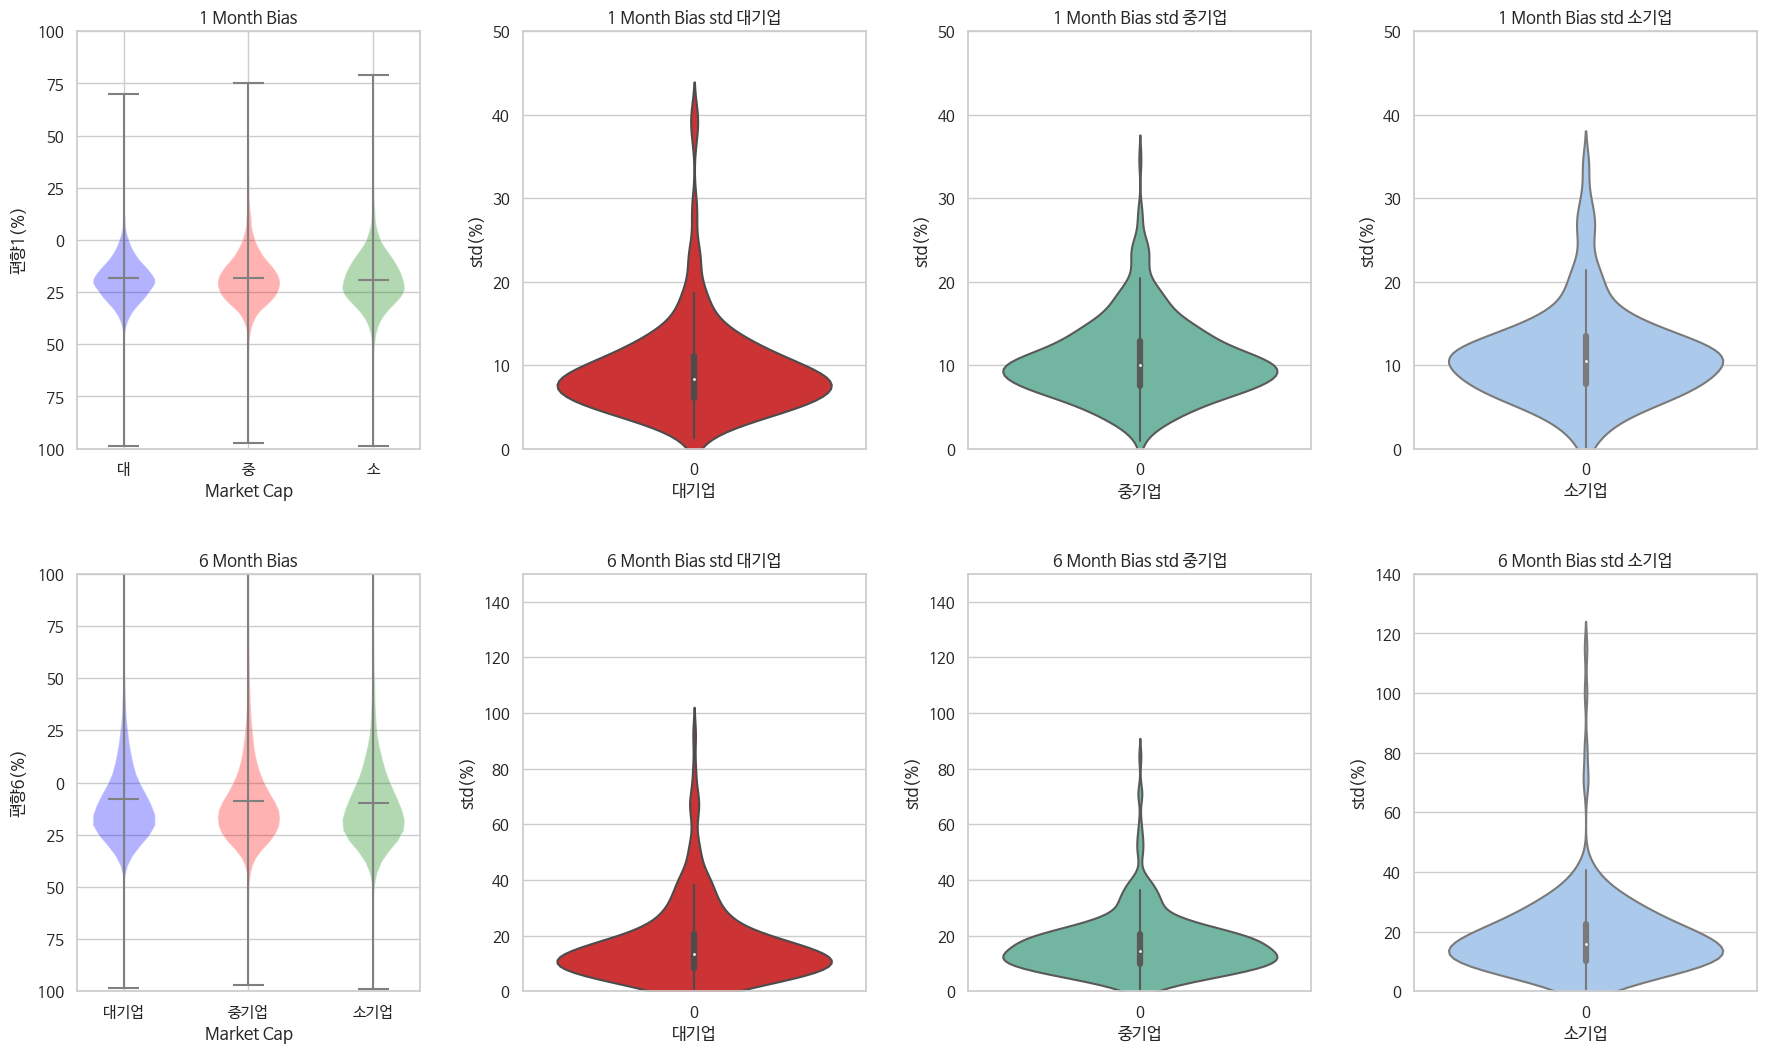

In [8]:
# 시가총액별 분석 편향 표준편차
import seaborn as sns

sns.set_theme(style="whitegrid")
df_cap = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터마이닝/enter_value.csv', engine = 'python')
df_cap = df.merge(df_cap, on = '종목명', how = 'left')

plt.rc('font', family='NanumBarunGothic')

df_a = df_cap[df_cap['시가총액']>=100000]
df_b = df_cap[(df_cap['시가총액']<100000) & (df_cap['시가총액']>=10000)]
df_c = df_cap[df_cap['시가총액']<10000]

df_aW = df_a[['Writer_ID', '편향1(%)', '편향6(%)']]
df_bW = df_b[['Writer_ID', '편향1(%)', '편향6(%)']]
df_cW = df_c[['Writer_ID', '편향1(%)', '편향6(%)']]

df_temp = pd.DataFrame({'Cap report count' : df_aW.groupby('Writer_ID').size()}).reset_index()
df_aW = df_aW.merge(df_temp, on = "Writer_ID", how = "left")
df_aW = df_aW[df_aW['Cap report count']>=5]
df_aW = df_aW.drop(columns = 'Cap report count', axis = 1)
df_aW = df_aW.groupby('Writer_ID').std()
df_aW = df_aW.merge(df_temp, on = "Writer_ID", how = "left")

df_temp = pd.DataFrame({'Cap report count' : df_bW.groupby('Writer_ID').size()}).reset_index()
df_bW = df_bW.merge(df_temp, on = "Writer_ID", how = "left")
df_bW = df_bW[df_bW['Cap report count']>=3]
df_bW = df_bW.drop(columns = 'Cap report count', axis = 1)
df_bW = df_bW.groupby('Writer_ID').std()
df_bW = df_bW.merge(df_temp, on = "Writer_ID", how = "left")

df_temp = pd.DataFrame({'Cap report count' : df_cW.groupby('Writer_ID').size()}).reset_index()
df_cW = df_cW.merge(df_temp, on = "Writer_ID", how = "left")
df_cW = df_cW[df_cW['Cap report count']>=3]
df_cW = df_cW.drop(columns = 'Cap report count', axis = 1)
df_cW = df_cW.groupby('Writer_ID').std()
df_cW = df_cW.merge(df_temp, on = "Writer_ID", how = "left")

# 1개월 편향(%)
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 12))

violin = axes[0, 0].violinplot([df_a['편향1(%)'], df_b['편향1(%)'], df_c['편향1(%)']], showmeans=True)
axes[0, 0].set_title('1 Month Bias')
axes[0, 0].set_ylim(-100, 100.0)
axes[0, 0].set_xticks(np.arange(1, 4))
axes[0, 0].set_xticklabels(['대', '중', '소'])
axes[0, 0].set_xlabel('Market Cap')
axes[0, 0].set_ylabel('편향1(%)')

violin['bodies'][0].set_facecolor('blue')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('green')

violin['cbars'].set_edgecolor('gray')
violin['cmaxes'].set_edgecolor('gray')
violin['cmins'].set_edgecolor('gray')
violin['cmeans'].set_edgecolor('gray')

# 1개월 애널리스트별 편향 표준편차

sns.violinplot(data = df_aW['편향1(%)'], ax = axes[0, 1], palette='Set1')
axes[0, 1].set_title('1 Month Bias std 대기업')
axes[0, 1].set_ylim(0, 50.0)
axes[0, 1].set_xlabel('대기업')
axes[0, 1].set_ylabel('std(%)')

sns.set(style='white')
sns.violinplot(data = df_bW['편향1(%)'], ax = axes[0, 2], palette='Set2')
axes[0, 2].set_title('1 Month Bias std 중기업')
axes[0, 2].set_ylim(0, 50.0)
axes[0, 2].set_xlabel('중기업')
axes[0, 2].set_ylabel('std(%)')

sns.violinplot(data = df_cW['편향1(%)'], ax = axes[0, 3], palette='pastel')
axes[0, 3].set_title('1 Month Bias std 소기업')
axes[0, 3].set_ylim(0, 50.0)
axes[0, 3].set_xlabel('소기업')
axes[0, 3].set_ylabel('std(%)')

# 6개월 편향(%)

violin = axes[1, 0].violinplot([df_a['편향6(%)'], df_b['편향6(%)'], df_c['편향6(%)']], showmeans=True)
axes[1, 0].set_title('6 Month Bias')
axes[1, 0].set_ylim(-100.0, 100.0)
axes[1, 0].set_xticks(np.arange(1, 4))
axes[1, 0].set_xticklabels(['대기업', '중기업', '소기업'])
axes[1, 0].set_xlabel('Market Cap')
axes[1, 0].set_ylabel('편향6(%)')

violin['bodies'][0].set_facecolor('blue')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('green')

violin['cbars'].set_edgecolor('gray')
violin['cmaxes'].set_edgecolor('gray')
violin['cmins'].set_edgecolor('gray')
violin['cmeans'].set_edgecolor('gray')

# 6개월 애널리스트별 편향 표준편차

sns.violinplot(data = df_aW['편향6(%)'], ax = axes[1, 1], palette='Set1')
axes[1, 1].set_title('6 Month Bias std 대기업')
axes[1, 1].set_ylim(0, 150.0)
axes[1, 1].set_xlabel('대기업')
axes[1, 1].set_ylabel('std(%)')

sns.violinplot(data = df_bW['편향6(%)'], ax = axes[1, 2], palette='Set2')
axes[1, 2].set_title('6 Month Bias std 중기업')
axes[1, 2].set_ylim(0, 150.0)
axes[1, 2].set_xlabel('중기업')
axes[1, 2].set_ylabel('std(%)')

sns.violinplot(data = df_cW['편향6(%)'], ax = axes[1, 3], palette='pastel')
axes[1, 3].set_title('6 Month Bias std 소기업')
axes[1, 3].set_ylim(0, 140.0)
axes[1, 3].set_xlabel('소기업')
axes[1, 3].set_ylabel('std(%)')

plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.3)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

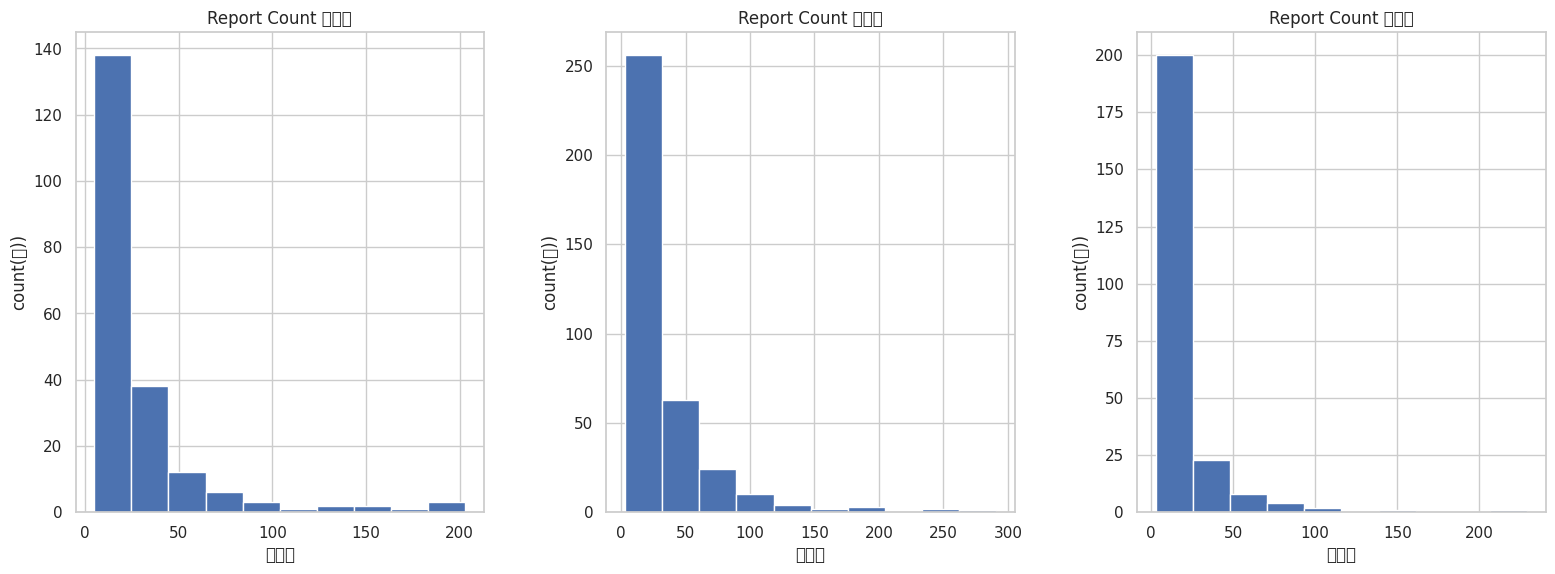

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 6))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(131)
plt.hist(df_aW['Cap report count'])
#sns.violinplot(data = df_aW['Cap report count'], ax = axes[0], palette='Set1')
axes[0].set_title('Report Count 대기업')
#axes[0, 0].set_ylim(0, 150.0)
axes[0].set_xlabel('대기업')
axes[0].set_ylabel('count(개))')

plt.subplot(132)
plt.hist(df_bW['Cap report count'])
#sns.violinplot(data = df_bW['Cap report count'], ax = axes[1], palette='Set2')
axes[1].set_title('Report Count 중기업')
#axes[0, 0].set_ylim(0, 150.0)
axes[1].set_xlabel('중기업')
axes[1].set_ylabel('count(개))')

plt.subplot(133)
plt.hist(df_cW['Cap report count'])
#sns.violinplot(data = df_cW['Cap report count'], ax = axes[2], palette='pastel')
axes[2].set_title('Report Count 소기업')
#axes[0, 0].set_ylim(0, 150.0)
axes[2].set_xlabel('소기업')
axes[2].set_ylabel('count(개))')

plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.3)
plt.show()

<ipython-input-10-d9b6b6f44809>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_atemp = df_a[['종목명', '편향1(%)', '시가총액']].groupby('시가총액').std()
<ipython-input-10-d9b6b6f44809>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_btemp = df_b[['종목명', '편향1(%)', '시가총액']].groupby('시가총액').std()
<ipython-input-10-d9b6b6f44809>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ctemp = df_c[['종목명', '편향1(%)', '시가총액']].groupb

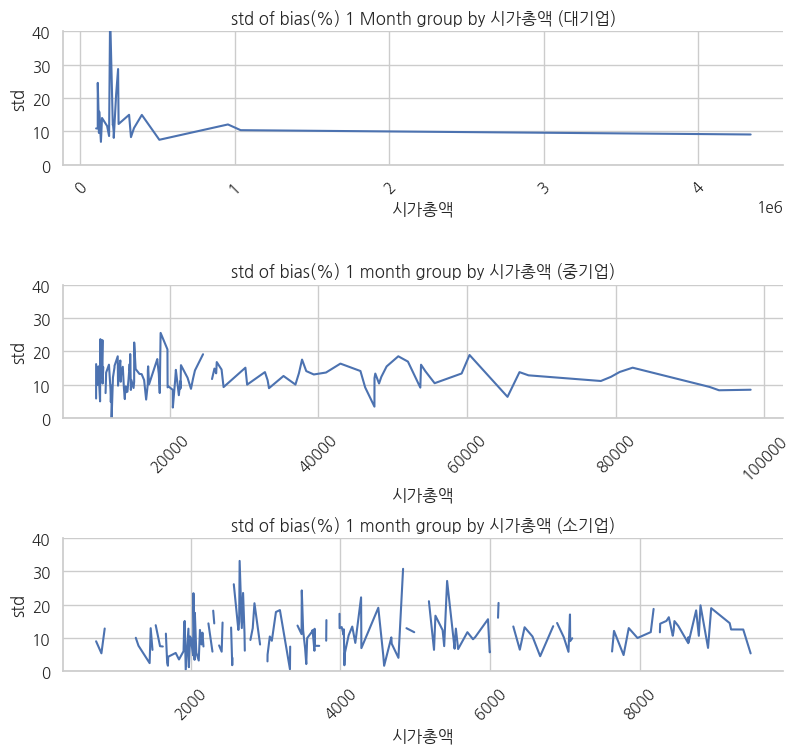

In [10]:
# 기업별 시각화
plt.rcParams['font.family'] = font_name
fig = plt.figure(figsize=(18, 36))

plt.subplot(311)
df_atemp = df_a[['종목명', '편향1(%)', '시가총액']].groupby('시가총액').std()
df_atemp['편향1(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 1 Month group by 시가총액 (대기업)')
plt.xticks(rotation=45)
plt.xlabel('시가총액')
plt.ylabel('std')
plt.ylim(0, 40)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.subplot(312)
df_btemp = df_b[['종목명', '편향1(%)', '시가총액']].groupby('시가총액').std()
df_btemp['편향1(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 1 month group by 시가총액 (중기업)')
plt.xticks(rotation=45)
plt.xlabel('시가총액')
plt.ylabel('std')
plt.ylim(0, 40)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.subplot(313)
df_ctemp = df_c[['종목명', '편향1(%)', '시가총액']].groupby('시가총액').std()
df_ctemp['편향1(%)'].plot(kind='line', figsize=(8, 8), title='std of bias(%) 1 month group by 시가총액 (소기업)')
plt.xticks(rotation=45)
plt.xlabel('시가총액')
plt.ylabel('std')
plt.ylim(0, 40)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.subplots_adjust(left=0.1, bottom=0,  right=1, top=0.8, wspace=0.5, hspace=0.9)
plt.show()

In [11]:
df_at = df_a.groupby('종목명').std().sort_values(by = '편향1(%)', ascending=False)
df_at.head()

<ipython-input-11-042171dc16ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_at = df_a.groupby('종목명').std().sort_values(by = '편향1(%)', ascending=False)


,Unnamed: 0_x,목표가,편향1,편향3,편향6,편향1(%),편향3(%),편향6(%),편향12,편향12(%),code,Report count,Sector count,Unnamed: 0_y,시가총액,Rank
종목명,,,,,,,,,,,,,,,,
에코프로,2789.293638,204725.018826,169662.400077,272884.829186,428869.525614,45.090587,55.976699,186.284187,560578.347186,341.328676,0.0,0.000000,0.0,0.0,0.0,0.0
에코프로비엠,2582.713155,166342.667614,77584.819630,96265.430246,137899.938797,28.706781,43.554483,73.740678,151705.401432,82.620609,0.0,46.443161,0.0,0.0,0.0,0.0
카카오뱅크,2068.109229,332550.500367,332671.047190,332833.598947,332912.495518,24.557038,25.107243,25.748426,332918.943058,25.861311,0.0,173.573504,0.0,0.0,0.0,0.0
포스코퓨처엠,819.356001,114208.956366,103492.385273,142824.300987,142824.300987,21.060562,31.692604,31.692604,142824.300987,31.692604,0.0,42.449634,0.0,0.0,0.0,0.0
셀트리온헬스케어,5314.828614,36598.900798,32095.171674,37038.346584,38215.894200,15.929577,24.586676,26.603793,44930.841903,38.687999,0.0,56.453672,0.0,0.0,0.0,0.0


In [12]:
df_att = df_a[df_a['종목명']=='삼성전자']
df_att[['종목명', '작성일', '목표가', '편향1(%)', '편향6(%)', '시가총액']].sort_values('편향1(%)', ascending = False)

,종목명,작성일,목표가,편향1(%),편향6(%),시가총액
4432,삼성전자,2016-07-08,1510000.0,11.721854,32.119205,4340032.0
11116,삼성전자,2013-10-08,1350000.0,11.111111,11.111111,4340032.0
6273,삼성전자,2017-04-10,2150000.0,9.348837,24.697674,4340032.0
4436,삼성전자,2016-07-29,1590000.0,6.100629,25.471698,4340032.0
2563,삼성전자,2019-01-09,45000.0,5.555556,5.555556,4340032.0
...,...,...,...,...,...,...
7765,삼성전자,2012-06-27,2000000.0,-39.950000,-23.350000,4340032.0
11136,삼성전자,2014-08-01,2200000.0,-40.136364,-36.363636,4340032.0
11138,삼성전자,2014-08-04,2200000.0,-40.136364,-36.363636,4340032.0
11141,삼성전자,2014-08-26,2200000.0,-43.545455,-36.363636,4340032.0


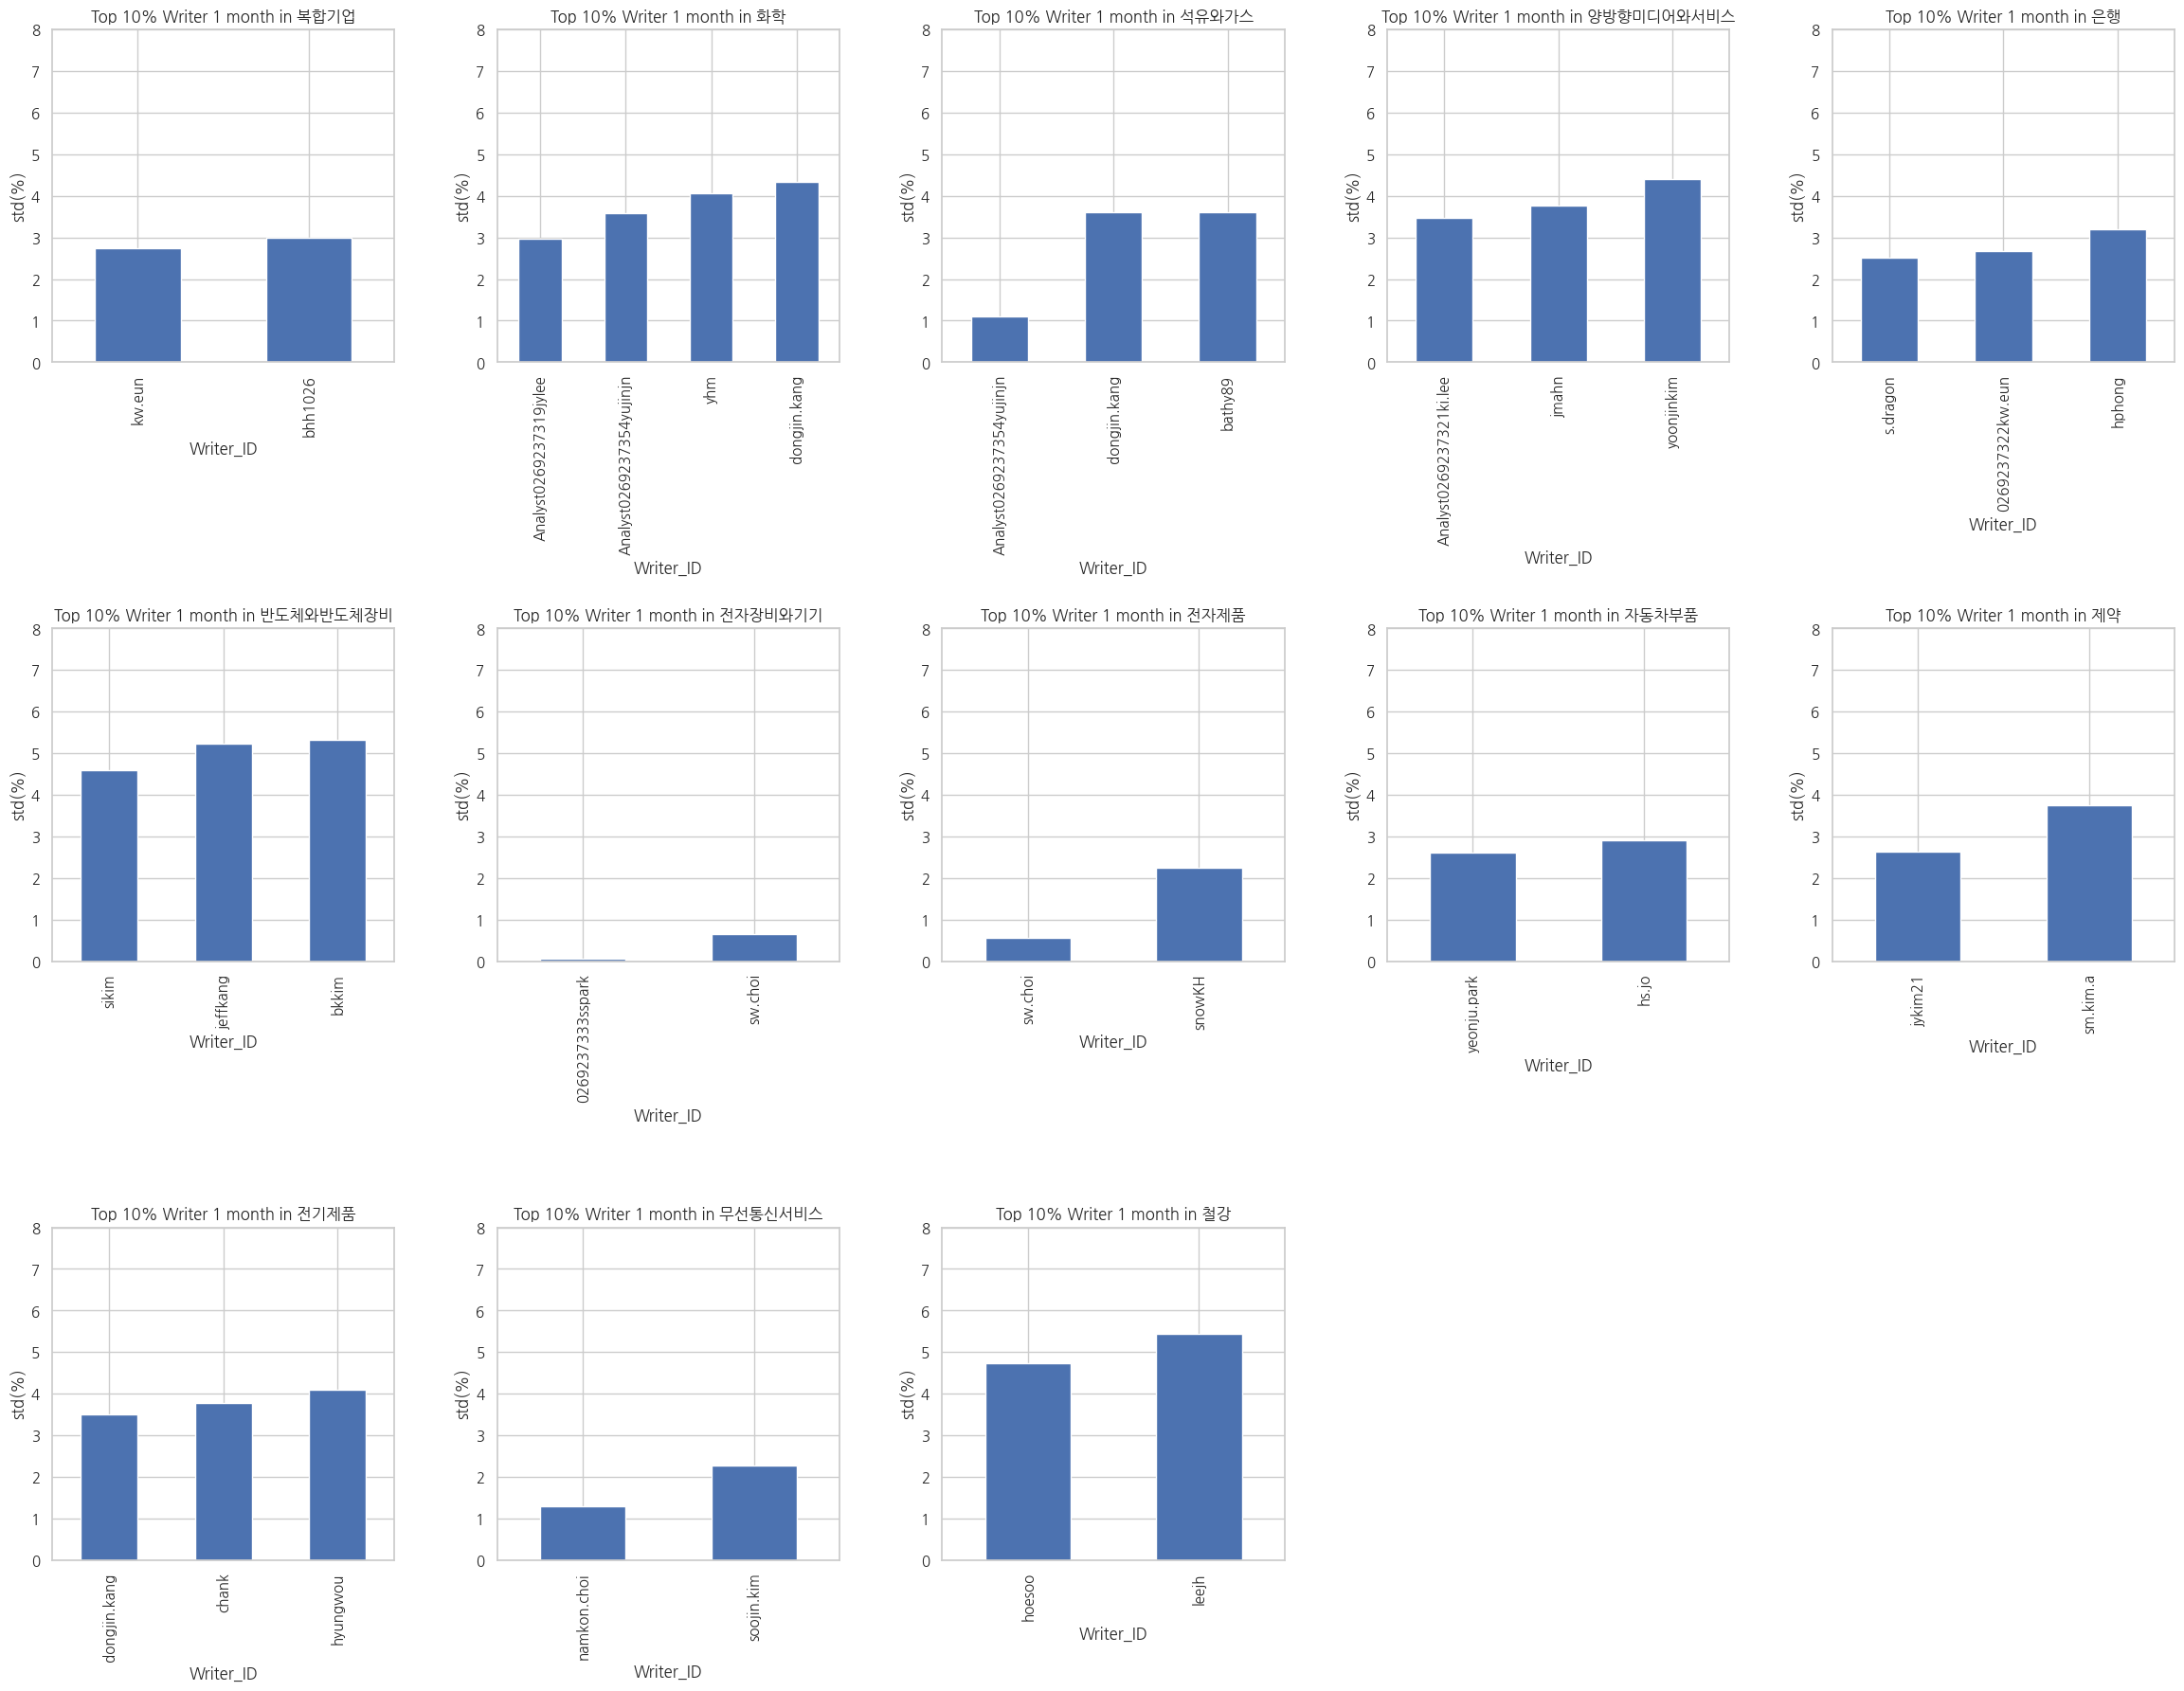

In [13]:
# 1개월 섹터별 상위 (대기업)
plt.rcParams['font.family'] = font_name
fig = plt.figure(figsize=(32, 36))
df_sector_ID_count_1a = pd.DataFrame(df_a.groupby('sector')['Writer_ID'].nunique()).reset_index()

cnt = 1
for i in df_a['sector'].unique():
  df_top = df_a.loc[df_a['sector'] == i]
  df_top = df_top[['Writer_ID', '편향1(%)']]


  # 특정 섹터에서 레포트 3개 이상 작성한 사람의 레포트만 추출
  df_temp = pd.DataFrame({'Report count': df_a.groupby('Writer_ID').size()}).reset_index()
  df_top = df_top.merge(df_temp, on = 'Writer_ID', how = 'left')
  df_top = df_top.loc[df_top['Report count']>=3]

  df_top = df_top.groupby('Writer_ID').std()
  idcnt = df_sector_ID_count_1a.loc[df_sector_ID_count_1a['sector']==i]['Writer_ID']
  df_top = df_top.sort_values(by = '편향1(%)')[:max(int(idcnt*0.1), 2)] # 섹터별 상위 10% 시각화

  plt.subplot(5, 5, cnt)
  plt.ylim(0, 8)
  plt.ylabel('std(%)')
  df_top['편향1(%)'].plot(kind='bar', title='Top 10% Writer 1 month in '+str(i))
  cnt = cnt + 1

plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.8)
plt.show()

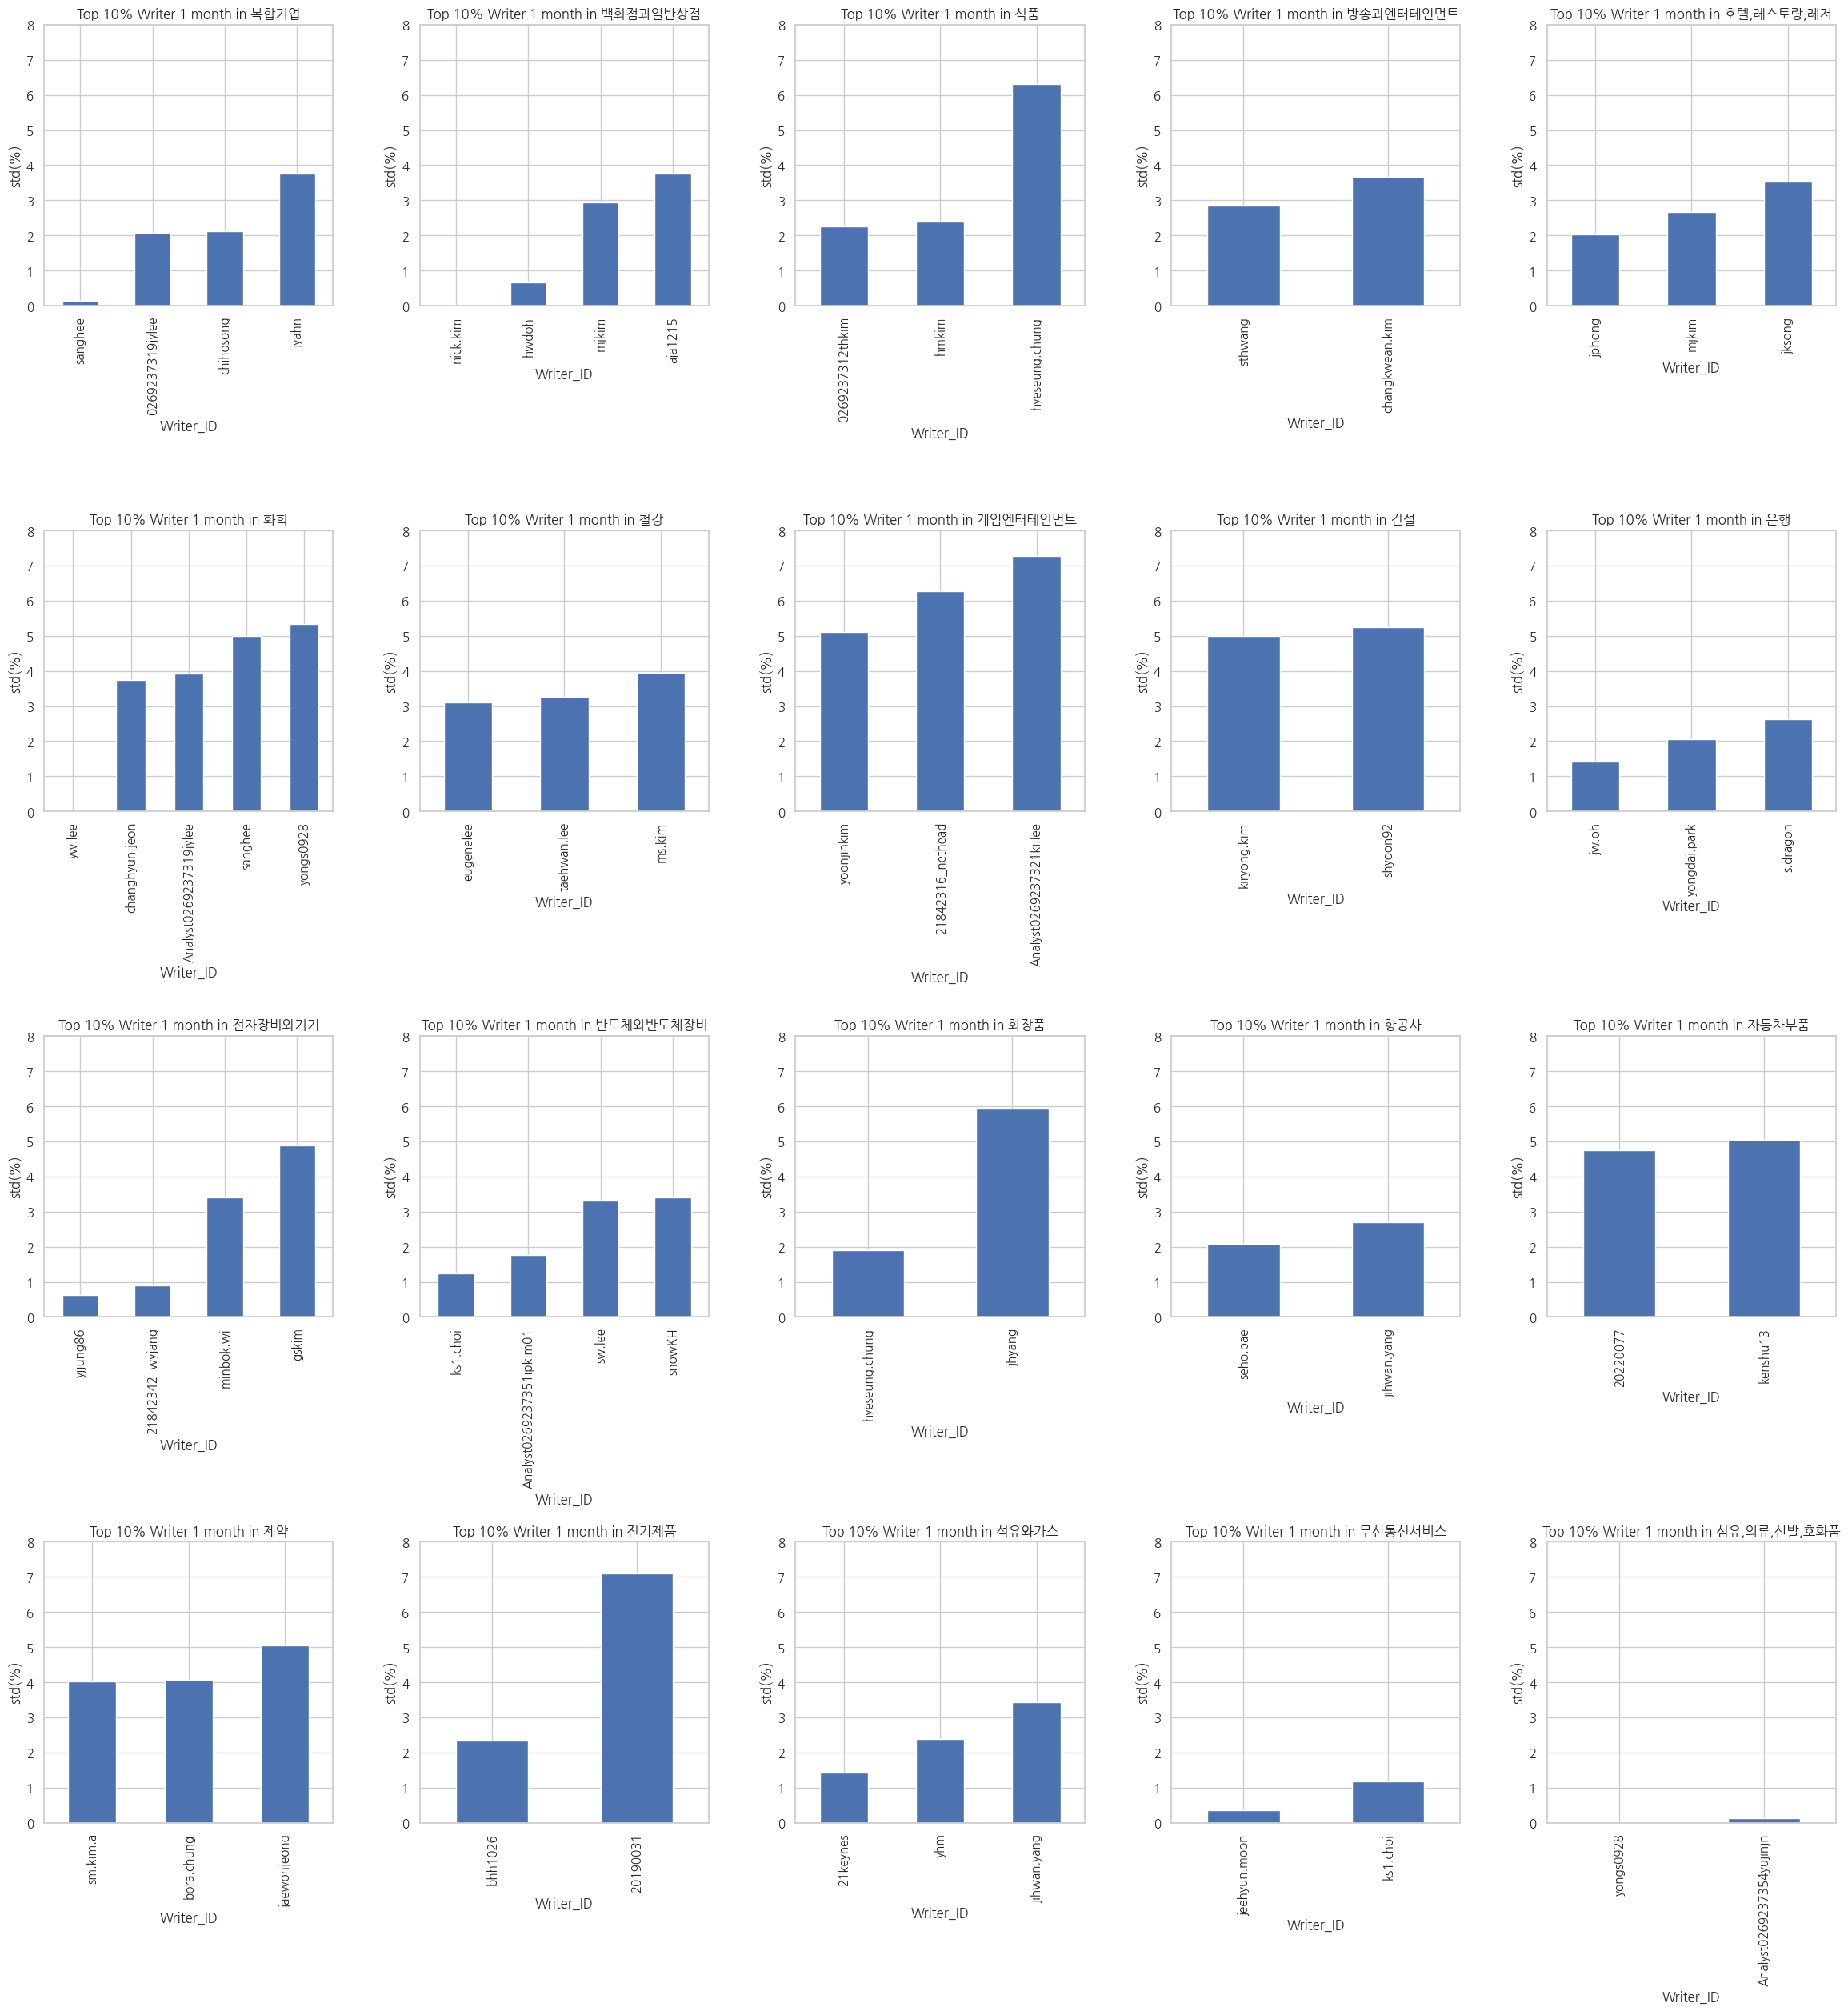

In [14]:
# 1개월 섹터별 상위 (중기업)
plt.rcParams['font.family'] = font_name
fig = plt.figure(figsize=(32, 36))
df_sector_ID_count_1b = pd.DataFrame(df_b.groupby('sector')['Writer_ID'].nunique()).reset_index()

cnt = 1
for i in df_b['sector'].unique():
  df_top = df_b.loc[df_b['sector'] == i]
  df_top = df_top[['Writer_ID', '편향1(%)']]


  # 특정 섹터에서 레포트 3개 이상 작성한 사람의 레포트만 추출
  df_temp = pd.DataFrame({'Report count': df_b.groupby('Writer_ID').size()}).reset_index()
  df_top = df_top.merge(df_temp, on = 'Writer_ID', how = 'left')
  df_top = df_top.loc[df_top['Report count']>=3]

  df_top = df_top.groupby('Writer_ID').std()
  idcnt = df_sector_ID_count_1b.loc[df_sector_ID_count_1b['sector']==i]['Writer_ID']
  df_top = df_top.sort_values(by = '편향1(%)')[:max(int(idcnt*0.1), 2)] # 섹터별 상위 10% 시각화

  plt.subplot(5, 5, cnt)
  plt.ylim(0, 8)
  plt.ylabel('std(%)')
  df_top['편향1(%)'].plot(kind='bar', title='Top 10% Writer 1 month in '+i)
  cnt = cnt + 1

plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.8)
plt.show()

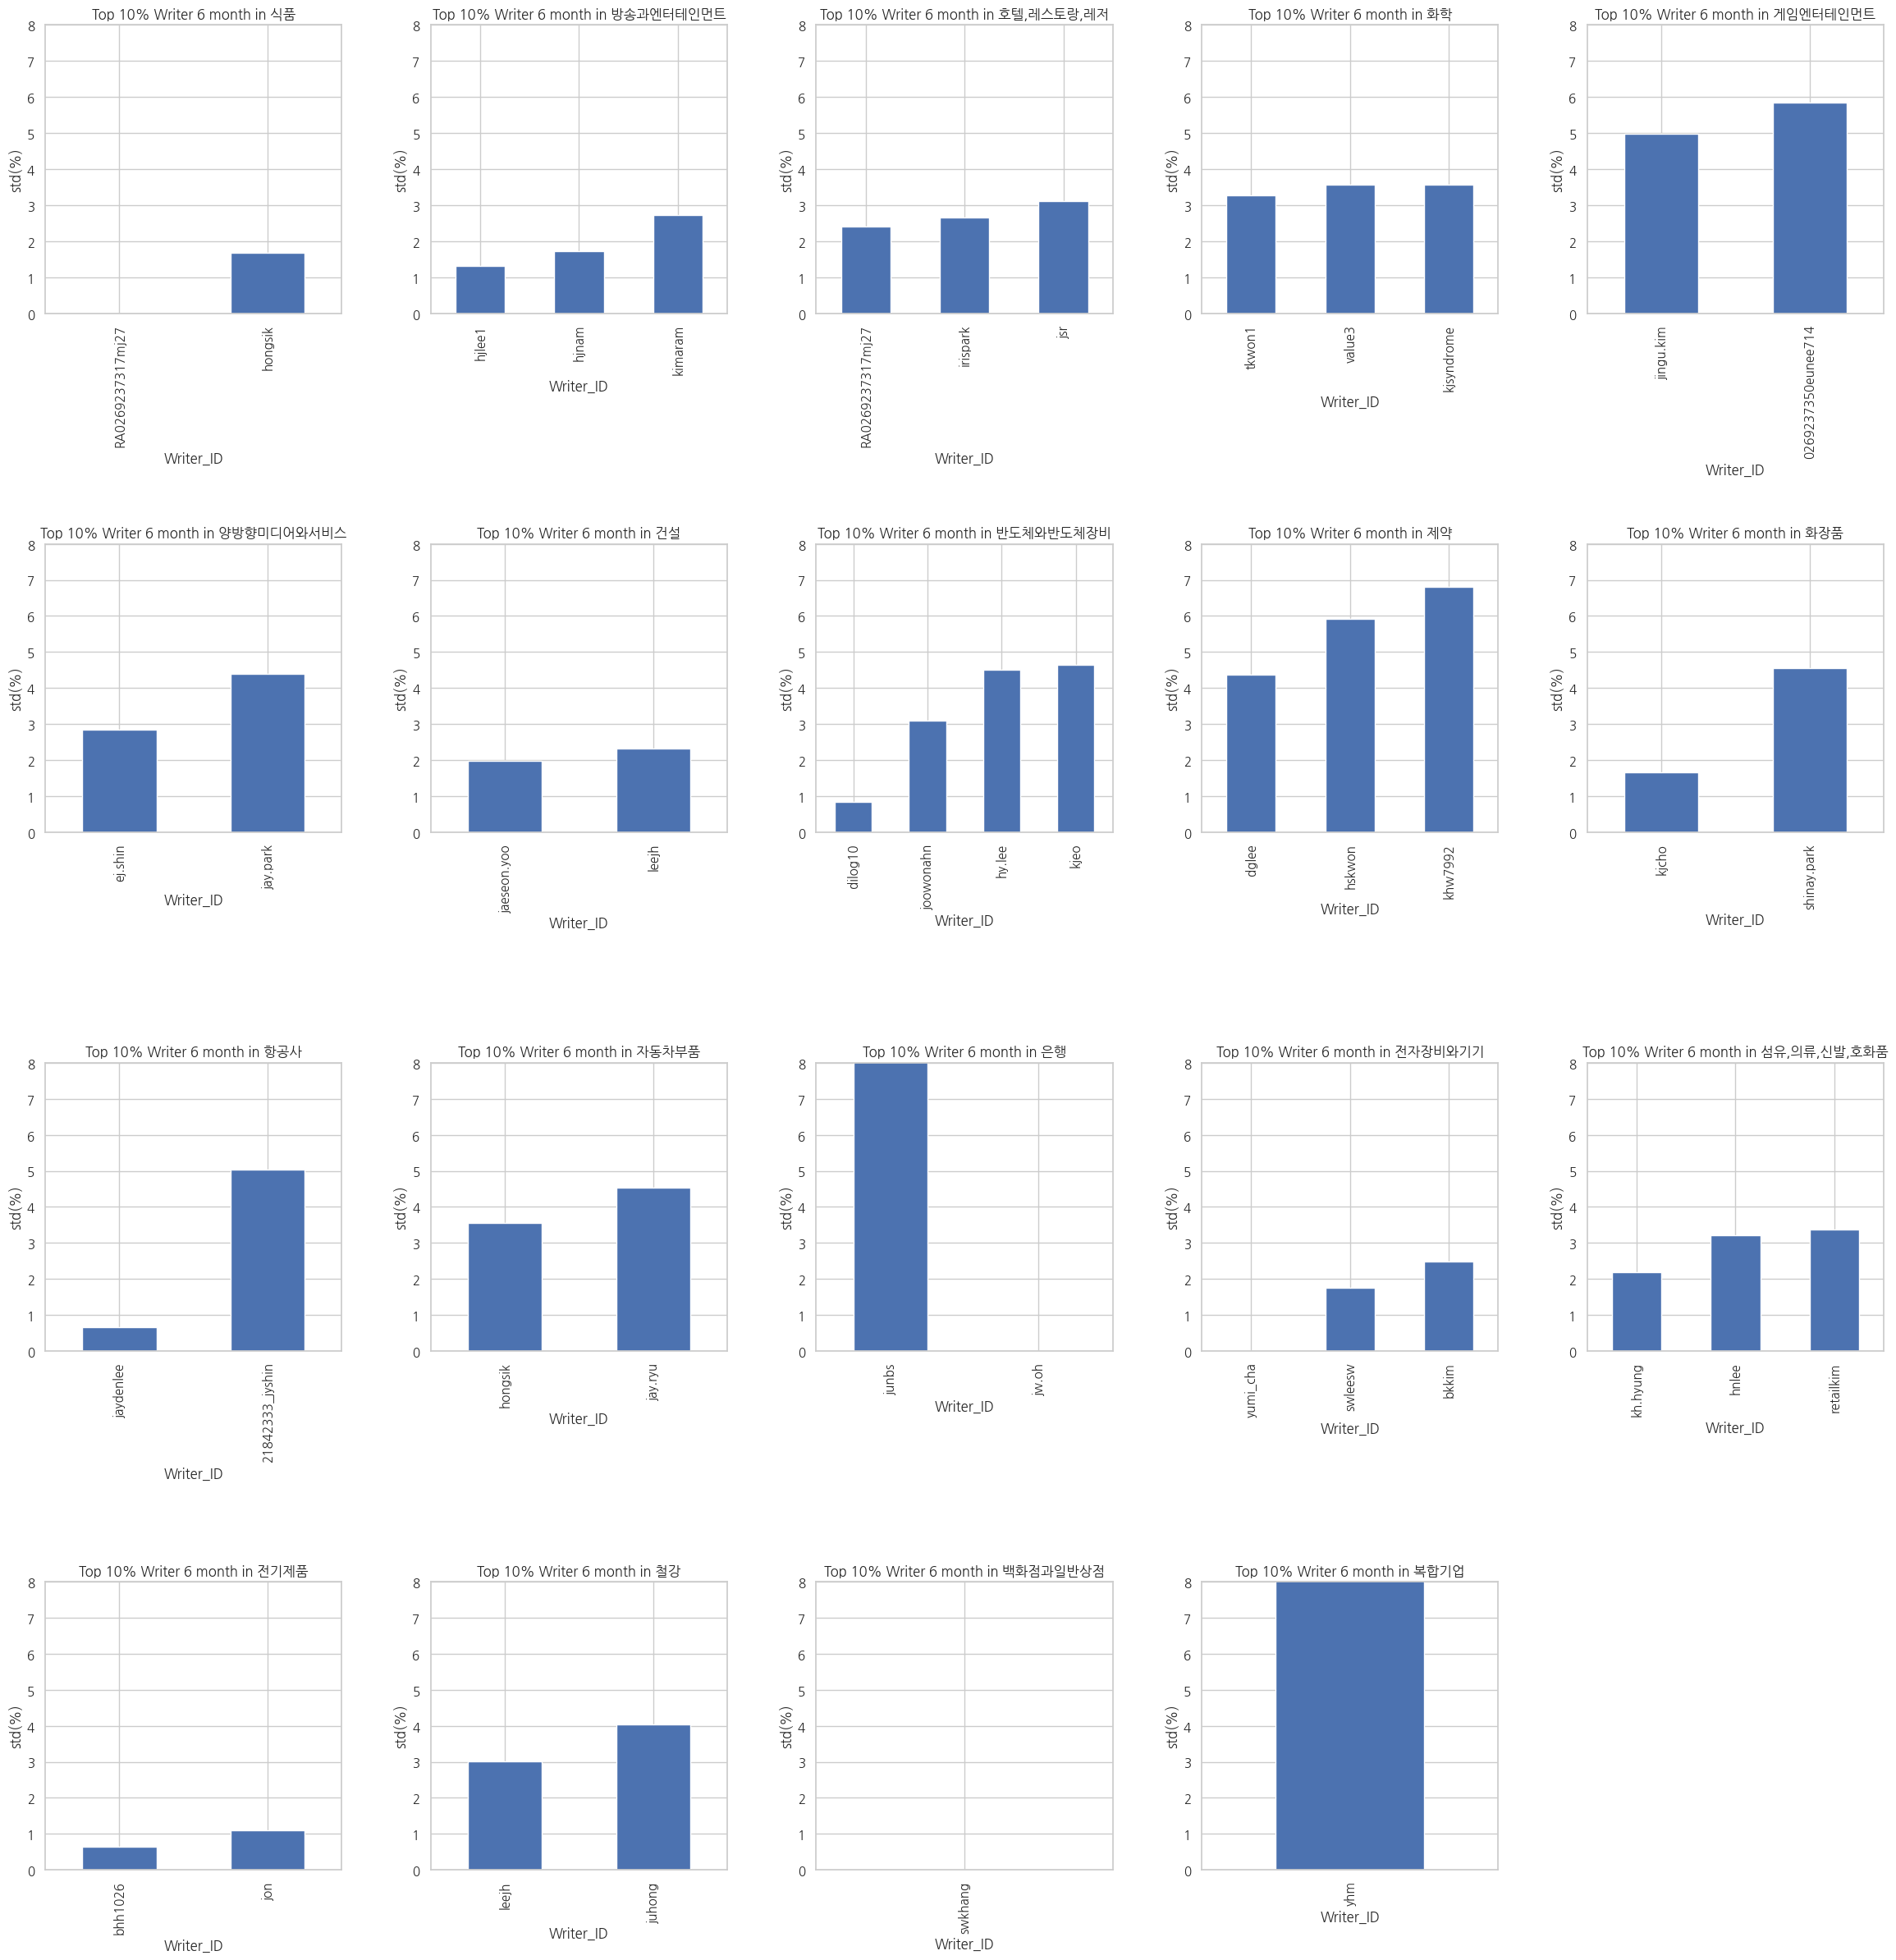

In [15]:
# 1개월 섹터별 상위 (소기업)
fig = plt.figure(figsize=(32, 36))
df_sector_ID_count_1c = pd.DataFrame(df_c.groupby('sector')['Writer_ID'].nunique()).reset_index()

cnt = 1
for i in df_c['sector'].unique():
  df_top = df_c.loc[df_c['sector'] == i]
  df_top = df_top[['Writer_ID', '편향1(%)']]


  # 특정 섹터에서 레포트 3개 이상 작성한 사람의 레포트만 추출
  df_temp = pd.DataFrame({'Report count': df_c.groupby('Writer_ID').size()}).reset_index()
  df_top = df_top.merge(df_temp, on = 'Writer_ID', how = 'left')
  df_top = df_top.loc[df_top['Report count']>=3]

  df_top = df_top.groupby('Writer_ID').std()
  idcnt = df_sector_ID_count_1c.loc[df_sector_ID_count_1c['sector']==i]['Writer_ID']
  df_top = df_top.sort_values(by = '편향1(%)')[:max(int(idcnt*0.1), 2)] # 섹터별 상위 10% 시각화

  plt.subplot(5, 5, cnt)
  plt.ylim(0, 8)
  plt.ylabel('std(%)')
  df_top['편향1(%)'].plot(kind='bar', title='Top 10% Writer 6 month in '+i)
  cnt = cnt + 1

plt.subplots_adjust(left=0.1, bottom=0,  right=0.8, top=0.8, wspace=0.3, hspace=0.8)
plt.show()